In [175]:
URL = "https://www.youtube.com/watch?v=y316Fh2Qlzk"

In [176]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import random

In [177]:
# 웹드라이버 설정
browser = webdriver.Chrome()
browser.get(URL)  # 유튜브 비디오 URL 입력

time.sleep(2)  # 페이지 로딩 대기

# 댓글 섹션까지 스크롤
browser.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
time.sleep(2)  # 동적 로딩 대기

In [178]:
# 스크롤 다운하여 모든 댓글 로드
last_height = browser.execute_script("return document.documentElement.scrollHeight")
while True:
    browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(random.uniform(1.5, 3.0))  # 로딩과 다양성을 위해 랜덤 대기 시간 적용
    new_height = browser.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [179]:
# 댓글 요소 수집
comments = browser.find_elements(By.XPATH, '//*[@id="content-text"]')
usernames = browser.find_elements(By.XPATH, '//*[@id="author-text"]')
likes = browser.find_elements(By.XPATH, '//*[contains(@id, "vote-count-middle")]')
#dates = browser.find_elements(By.XPATH, '//*[@id="header-author"]//yt-formatted-string/a')
#reply_counts = browser.find_elements(By.XPATH, '//ytd-comment-thread-renderer//span[@id="vote-count-middle"]/following-sibling::span')

# DataFrame 생성
data = {
    # '작성일': [date.text for date in dates],
    '사용자이름': [username.text for username in usernames],
    'comment': [comment.text for comment in comments],
    '좋아요수': [like.text if like.text != '' else '0' for like in likes],
    # '답글수': [reply.text.split()[0] if reply.text != '' else '0' for reply in reply_counts]
}
df = pd.DataFrame(data)

# DataFrame 확인
print(df)


                사용자이름                                            comment 좋아요수
0    @user-xf5os8nn3i  신이시여\n우리 유작가님께 200살의 수명을 주십시오\n우리곁에 오래오래 함께 할수...  132
1    @user-um3lv9ce5v  유시민작가님~~유튜브 어디든\n어준총수 겸공이든 매불쇼든\n어디든 좀 나와서 현상황...   16
2    @user-pd1xr2op1n  위대한 정치가인 노무현 대통령님 존경하고 넘 그립습니다.\n박학다식 유작가님, 박교...  172
3    @user-kr6nx5no2s  유시민 작가님이 그 자리에 그저 계셔주신 것만으로도 든든합니다. 감사합니다.\n항상...  140
4     @nayoungkim5688  유시민작가님이 계셔서 든든합니다.고맙습니다.감사합니다\n조수진변호사님 항상 감사합니...  147
5     @rayawesome6762                잘 들었습니다. 조수진 변호사님 나오니까 훨씬 즐겁고 재밌다요~  119
6     @danielle-wo5rx             언제들어도 재미있는 지리이야기!\n유작가님과 함께라서 더욱 즐겁습니다  114
7        @rosemom8309  두둥~~~~\n드디어, 마침내 ~~!!\n유작가님의 흐믓한  미소!!  ㅎㅎ\n조변...   93
8    @user-us9ol9dc3j     제가 젤 좋아한 책중 하나입니다.\n잘 듣겠습니다 \n감사해요 알릴레오 북스 ♡.♡   71
9             @sj3865                        총균쇠. 이번 기회에 읽어야겠다. \n감사합니다.   48
10   @sungyonglee1095  조수진 변호사님 우리 모두는 알고 있습니다.수진님 언제나처럼 우리안에 함께 해  주...    8
11   @user-ve7yc1rn5q                         덕분에 매번 교양을 쌓을 수 있습

In [180]:
# pip install wordcloud

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# plt 한국어폰트설정맥북환경 애플고딕
rc('font', family='AppleGothic')


In [182]:
df['comment'] = df['comment'].str.replace('[^가-힣]', ' ', regex = True)
df['comment']

0      신이시여 우리 유작가님께    살의 수명을 주십시오 우리곁에 오래오래 함께 할수 있도록
1     유시민작가님  유튜브 어디든 어준총수 겸공이든 매불쇼든 어디든 좀 나와서 현상황에 ...
2     위대한 정치가인 노무현 대통령님 존경하고 넘 그립습니다  박학다식 유작가님  박교수...
3     유시민 작가님이 그 자리에 그저 계셔주신 것만으로도 든든합니다  감사합니다  항상 ...
4     유시민작가님이 계셔서 든든합니다 고맙습니다 감사합니다 조수진변호사님 항상 감사합니다...
5                   잘 들었습니다  조수진 변호사님 나오니까 훨씬 즐겁고 재밌다요 
6                 언제들어도 재미있는 지리이야기  유작가님과 함께라서 더욱 즐겁습니다
7     두둥     드디어  마침내      유작가님의 흐믓한  미소       조변님도 ...
8          제가 젤 좋아한 책중 하나입니다  잘 듣겠습니다  감사해요 알릴레오 북스    
9                            총균쇠  이번 기회에 읽어야겠다   감사합니다 
10    조수진 변호사님 우리 모두는 알고 있습니다 수진님 언제나처럼 우리안에 함께 해  주...
11                           덕분에 매번 교양을 쌓을 수 있습니다 감사합니다
12                               역시 아는것이 힘입니다 유시민작가님은 짱
13    이번편 총 균 세 편을 보다가 문득 두달전쯤에 유튜브에서 본게 생각났는데      ...
14    조 수진 변호사님과 유 시민 작가님  더욱 존경합니다  지리의 힘을 권유해주셔서 또...
15                                     세분 말씀 감사히 잘들었습니다
16           유시민작가님은 제인생에 큰영향을 준 사람               존경합니다
17    지난 영상부터 피드백 좋네요   진행자와 손님 좌석배치 딱 좋습니다  오늘도

In [183]:
# pip install soynlp

In [184]:
from soynlp.noun import LRNounExtractor_v2
import pandas as pd

# 모든 댓글을 하나의 문자열로 결합
comments_string = df['comment'].str.cat(sep=' ')

# soynlp 명사 추출기 인스턴스 생성
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract([comments_string])  # 배열 형태로 입력

# 추출된 명사를 다시 하나의 문자열로 결합
nouns_string = ' '.join(nouns.keys())  # 추출된 명사들의 key만 사용

# 결과 출력
nouns_string

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 645 from 1 sents. mem=0.064 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=816, mem=0.068 Gb
[Noun Extractor] batch prediction was completed for 251 words
[Noun Extractor] checked compounds. discovered 3 compounds
[Noun Extractor] postprocessing detaching_features : 76 -> 75
[Noun Extractor] postprocessing ignore_features : 75 -> 70
[Noun Extractor] postprocessing ignore_NJ : 70 -> 70
[Noun Extractor] 70 nouns (3 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.069 Gb                    
[Noun Extractor] 29.17 % eojeols are covered


'유시민작가님 유작가님 변호사님 알릴레오 총균쇠 화이팅 유시민 도서관 우리곁 유튜브 알북스 언제나 작가님 어르신 오늘 시간 감사 존경 시청 영상 재미 시도 알게 자리 정치 응원 든든 시작 사람 언젠 좋아 강릉 알북 기대 댓글 유익 미소 북스 생각 지리 말씀 한분 세분 새 책 부 못 대 것 힘 쇠 바 참 여 편 살 삶 귀 왜 년 갓 내 세 매 분 많 돈 손 알릴레오북스 기대기대'

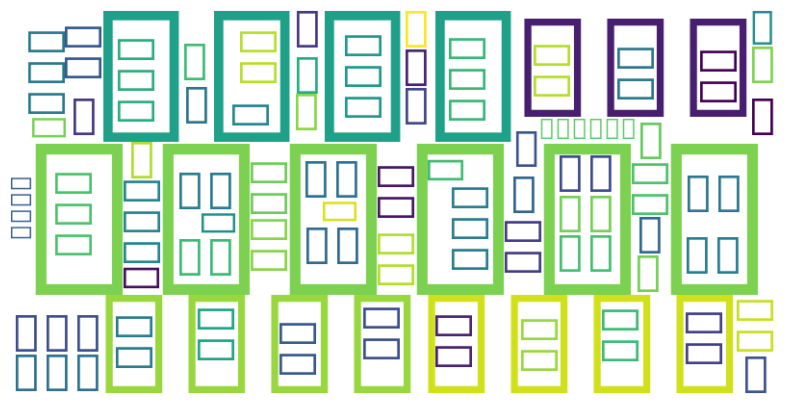

In [187]:
# 워드 클라우드 생성
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(nouns_string)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [185]:
# !pip install konlpy

In [186]:
# 자바 버전 이슈로 실행이 안됨


# from konlpy.tag import Okt
# import pandas as pd

# # Okt 형태소 분석기 인스턴스 생성
# okt = Okt()


# # 모든 댓글을 하나의 문자열로 결합
# comments_string = df['comment'].str.cat(sep=' ')

# # 명사 추출
# nouns = okt.nouns(comments_string)

# # 추출된 명사를 다시 하나의 문자열로 결합
# nouns_string = ' '.join(nouns)


# # 워드 클라우드 생성
# wordcloud = WordCloud(font_path = '/System/Library/Fonts/AppleGothic.ttf',
#                       width = 800,
#                       height = 400, 
#                       background_color ='white').generate(nouns_string)

# # 워드 클라우드 표시
# plt.figure(figsize=(100, 50))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()